# Linear Regression
## download boston real estate dataset

In [1]:
import sklearn.datasets as dt
bunch = dt.load_boston()
bunch

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# print the dataset description in a nicely formatted way

In [2]:
print (bunch.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# stuff the dataset independent variables and names into a data frame

In [3]:
import pandas as pd
dfX = pd.DataFrame(bunch.data,columns=bunch.feature_names)
dfX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# put the dependent variable into its own data frame

In [4]:
dfY = pd.DataFrame(bunch.target, columns=['PRICE'])
dfY

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


# define a function that will be perform a regression analysis,
print the regression coefficients for each of the independent variables,
print the correlation coefficient, and return the regression object

In [5]:
# cols is a list of column names to be used as the independent variables in the regression
# cols must be a list even if it has only one name in it!!!
from sklearn.linear_model import LinearRegression
def doLinReg(cols):
    reg = LinearRegression()
    reg.fit(dfX[cols], dfY.PRICE)
    for i in range(0,len(cols)):
        print ('Coef: ', cols[i], '\t', format(reg.coef_[i],'7.3f'))
    score = reg.score(dfX[cols], dfY.PRICE)
    print ('R2 = ', format(100 * score ,'6.2f'))
    return reg

# run simple linear regression of price vs. one of the independent variables,
one at a time
also, make a scatter plot of the data with the regression line to verify the results

Coef:  CRIM 	  -0.415
R2 =   15.08


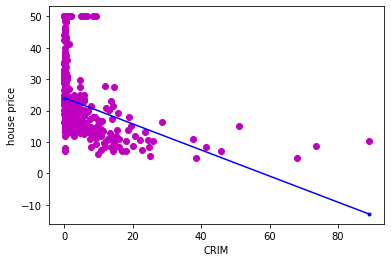

Coef:  ZN 	   0.142
R2 =   12.99


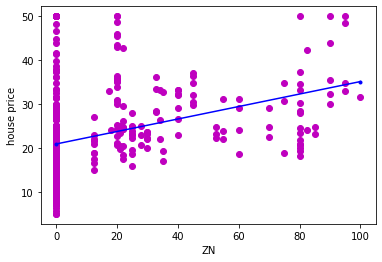

Coef:  INDUS 	  -0.648
R2 =   23.40


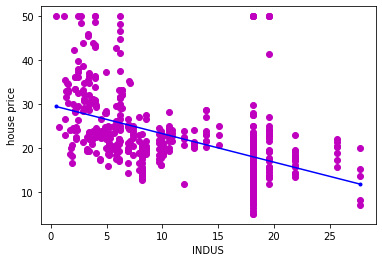

Coef:  CHAS 	   6.346
R2 =    3.07


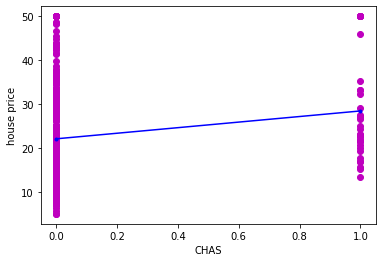

Coef:  NOX 	 -33.916
R2 =   18.26


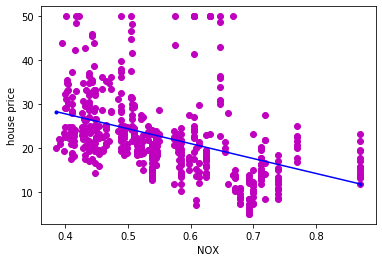

Coef:  RM 	   9.102
R2 =   48.35


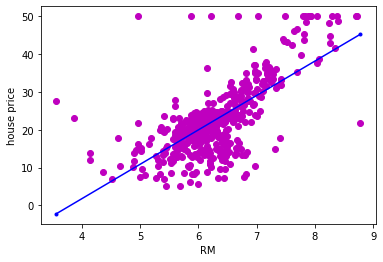

Coef:  AGE 	  -0.123
R2 =   14.21


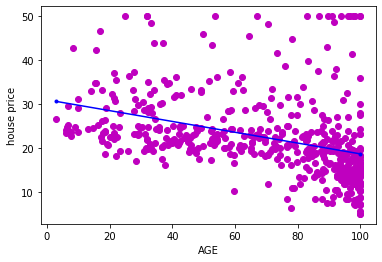

Coef:  DIS 	   1.092
R2 =    6.25


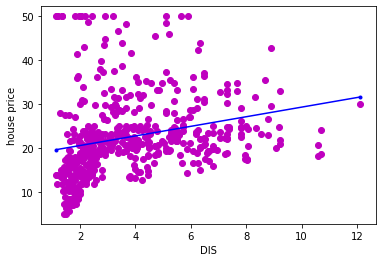

Coef:  RAD 	  -0.403
R2 =   14.56


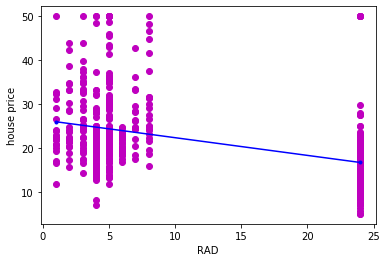

Coef:  TAX 	  -0.026
R2 =   21.95


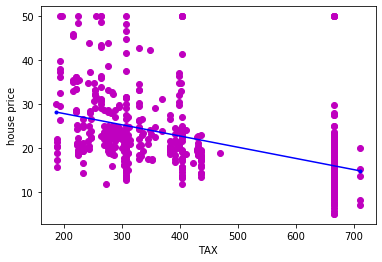

Coef:  PTRATIO 	  -2.157
R2 =   25.78


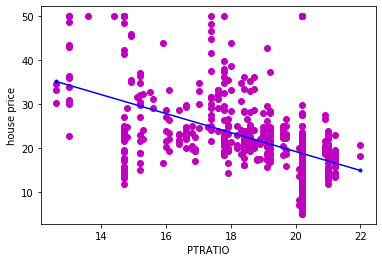

Coef:  B 	   0.034
R2 =   11.12


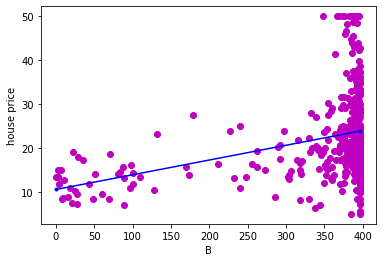

Coef:  LSTAT 	  -0.950
R2 =   54.41


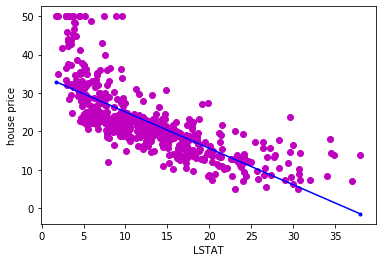

In [10]:
import matplotlib.pyplot as plt
import numpy as np
for col in range(0,len(bunch.feature_names)):
    colName = bunch.feature_names[col]
    plt.plot(dfX[colName], dfY.PRICE, 'mo ')
    plt.xlabel(colName)
    plt.ylabel('house price')
    reg = doLinReg([colName])
    regX = np.array([dfX[colName].min(), dfX[colName].max()])
    regY = (regX * reg.coef_[0]) + reg.intercept_
    plt.plot(regX, regY, 'b.-')
    plt.show()

# do the regression analysis on the two best independent variables

In [7]:
cols = ['RM', 'LSTAT']
reg = doLinReg(cols)

Coef:  RM 	   5.095
Coef:  LSTAT 	  -0.642
R2 =   63.86


# do the regression analysis on the four best independent variables

In [8]:
cols = ['RM', 'LSTAT', 'TAX', 'PTRATIO']
reg = doLinReg(cols)

Coef:  RM 	   4.586
Coef:  LSTAT 	  -0.545
Coef:  TAX 	  -0.002
Coef:  PTRATIO 	  -0.875
R2 =   67.97


# do the regression analysis on all of the independent variables

In [11]:
cols = bunch.feature_names
reg = doLinReg(cols)

Coef:  CRIM 	  -0.108
Coef:  ZN 	   0.046
Coef:  INDUS 	   0.021
Coef:  CHAS 	   2.687
Coef:  NOX 	 -17.767
Coef:  RM 	   3.810
Coef:  AGE 	   0.001
Coef:  DIS 	  -1.476
Coef:  RAD 	   0.306
Coef:  TAX 	  -0.012
Coef:  PTRATIO 	  -0.953
Coef:  B 	   0.009
Coef:  LSTAT 	  -0.525
R2 =   74.06


# should do something with predict()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler((0,10))
scalar.fit(dfX)
scaledX = scalar.transform(dfX)
scaledDFX =pd.DataFrame(scaledX, columns = bunch.feature_names)
scaledDFX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,1.8,0.678152,0.0,3.148148,5.775053,6.416066,2.692031,0.000000,2.080153,2.872340,10.000000,0.896799
1,0.002359,0.0,2.423021,0.0,1.728395,5.479977,7.826982,3.489620,0.434783,1.049618,5.531915,10.000000,2.044702
2,0.002357,0.0,2.423021,0.0,1.728395,6.943859,5.993821,3.489620,0.434783,1.049618,5.531915,9.897373,0.634658
3,0.002928,0.0,0.630499,0.0,1.502058,6.585553,4.418126,4.485446,0.869565,0.667939,6.489362,9.942761,0.333885
4,0.007051,0.0,0.630499,0.0,1.502058,6.871048,5.283213,4.485446,0.869565,0.667939,6.489362,10.000000,0.993377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.006329,0.0,4.204545,0.0,3.868313,5.809542,6.817714,1.226709,0.000000,1.641221,8.936170,9.876191,2.190949
502,0.004378,0.0,4.204545,0.0,3.868313,4.903238,7.600412,1.052933,0.000000,1.641221,8.936170,10.000000,2.028146
503,0.006119,0.0,4.204545,0.0,3.868313,6.543399,9.073120,0.943811,0.000000,1.641221,8.936170,10.000000,1.078918
504,0.011607,0.0,4.204545,0.0,3.868313,6.194673,8.898043,1.145141,0.000000,1.641221,8.936170,9.913006,1.310706


In [18]:
reg.fit(scaledDFX[cols], dfY.PRICE)
for i in range(0,len(cols)):
    print ('Coef: ', cols[i], '\t', format(reg.coef_[i],'7.3f'))
score = reg.score(scaledDFX[cols], dfY.PRICE)
print ('R2 = ', format(100 * score ,'6.2f'))


Coef:  CRIM 	  -0.961
Coef:  ZN 	   0.464
Coef:  INDUS 	   0.056
Coef:  CHAS 	   0.269
Coef:  NOX 	  -0.863
Coef:  RM 	   1.988
Coef:  AGE 	   0.007
Coef:  DIS 	  -1.623
Coef:  RAD 	   0.704
Coef:  TAX 	  -0.646
Coef:  PTRATIO 	  -0.896
Coef:  B 	   0.369
Coef:  LSTAT 	  -1.902
R2 =   74.06
